<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Объединение-таблиц" data-toc-modified-id="Объединение-таблиц-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Объединение таблиц</a></span></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Корреляционный анализ</a></span></li><li><span><a href="#Использование-пайплайнов" data-toc-modified-id="Использование-пайплайнов-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Использование пайплайнов</a></span></li></ul></div>

# Проект "Магазин "В один клик"

## Описание проекта


Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
<br>
Нам поручено разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.
<br>
Для работы нам предоставлены следующие данные:
<br>
1. **market_file.csv** - таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
<br>
2. **market_money.csv** - таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
<br>
3. **market_time.csv** - таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
<br>
4. **money.csv** - таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
<br>

Решать задачу предстоит в два этапа:
1. Необходимо разработать модель, которая предскажет вероятность снижения покупательской активности.
2. Далее, необходимо выделить сегмент покупателей, проанализировать его и предложить решение, как увеличить его покупательскую активность.

**План работы над проектом**
<br>
1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Объединение таблиц
5. Корреляционный анализ
6. Создание и применение моделей МО
7. Анализ важности признаков
8. Сегментация покупателей
9. Общий вывод

## Загрузка данных

In [1]:
!pip install shap -q
!pip install scikit-learn==1.1.3 -q
!pip -q install phik

In [2]:
# Импортируем необходимые нам библиотеки
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import phik
from phik import phik_matrix
from phik.report import plot_correlation_matrix
from scipy import stats as st
from scipy.stats import binom, norm, spearmanr
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    r2_score, 
    mean_squared_error, 
    mean_absolute_error, 
    accuracy_score, 
    confusion_matrix, 
    recall_score, 
    precision_score, 
    roc_auc_score, 
    f1_score
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import shap

In [3]:
# Загрузим данные market_file.csv, выбрав верный разделитель. Ознакомимся с содержимым.
market_file = pd.read_csv('./market_file.csv', sep = ',', decimal='.')
market_file.info()
market_file.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандартт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
6,215354,Снизилась,стандартт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2
7,215355,Снизилась,стандартт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4
8,215356,Снизилась,стандартт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3
9,215357,Снизилась,стандартт,да,3.9,5,154,0.00,Техника для красоты и здоровья,3,3,9,5


Данные содержат 13 столбцов и 1300 строки. Обращает на себя внимание различный стиль в названиях стобцов, опечатки в столбце "Тип сервиса". Тип данных местами не верный. Явных пропусков в данных нет. Исправим выявленные недостатки на этапе предобработки данных.

In [4]:
# Загрузим данные market_money.csv, выбрав верный разделитель. Ознакомимся с содержимым.
market_money = pd.read_csv('./market_money.csv', sep = ',', decimal=',')
market_money.info()
market_money.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       3900 non-null   int64 
 1   Период   3900 non-null   object
 2   Выручка  3900 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.5+ KB


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
8,215350,предыдущий_месяц,5457.5
9,215351,текущий_месяц,6610.4


Данные содержат 3 столбца и 3900 строк. Названия столбцов с заглавной буквы. Тип данных местами не верный. Явных пропусков в данных нет. Исправим выявленные недостатки на этапе предобработки данных.

In [5]:
# Загрузим данные market_time.csv, выбрав верный разделитель. Ознакомимся с содержимым.
market_time = pd.read_csv('./market_time.csv', sep = ',', decimal=',')
market_time.info()
market_time.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдцщий_месяц,8
6,215351,текущий_месяц,13
7,215351,предыдцщий_месяц,11
8,215352,текущий_месяц,11
9,215352,предыдцщий_месяц,8


Данные содержат 3 столбца и 2600 строк. Обращает на себя внимание различный стиль в названиях стобцов, опечатки в столбце "Период". Тип данных в норме. Явных пропусков в данных нет. Исправим выявленные недостатки на этапе предобработки данных.

In [6]:
# Загрузим данные money.csv, выбрав верный разделитель. Ознакомимся с содержимым.
money = pd.read_csv('./money.csv', sep = ';', decimal=',')
money.info()
money.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
5,215353,3.95
6,215354,3.62
7,215355,5.26
8,215356,4.93
9,215357,4.66


Данные содержат 2 столбца и 1300 строк. Название столбца "Прибыль" с заглавной буквы, исправим. Тип данных в норме. Явных пропусков в данных нет.

Вывод по загрузке данных: 
<br>
Данные загружены без проблем. Отмечены общие недочеты в наименованиях столбцов, не оптимальные типы некоторых данных и наличие опечаток. Исправим это на этапе предобработки данных.

## Предобработка данных


In [7]:
# Приведем к единому стилю названия столбцов в данных. Сделаим их в "змеином стиле" для удобства работы. Кириллицу оставляем.
market_file.columns = market_file.columns.str.replace(' ', '_').str.lower()
market_money.columns = market_money.columns.str.replace(' ', '_').str.lower()
market_time.columns = market_time.columns.str.replace(' ', '_').str.lower()
money.columns = money.columns.str.replace(' ', '_').str.lower()

In [8]:
# Исправим тип данных в market_file
market_file.info()
market_file.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандартт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
6,215354,Снизилась,стандартт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2
7,215355,Снизилась,стандартт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4
8,215356,Снизилась,стандартт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3
9,215357,Снизилась,стандартт,да,3.9,5,154,0.00,Техника для красоты и здоровья,3,3,9,5


In [9]:
# Необходимо изменить тип данных в столбцах 'маркет_актив_6_мес' и 'акционные_покупки' с 'object' на 'float64'
market_file['маркет_актив_6_мес'] = market_file['маркет_актив_6_мес'].astype('float64')
market_file['акционные_покупки'] = market_file['акционные_покупки'].astype('float64')

In [10]:
# Проверим данные на наличие опечаток
print(market_file['покупательская_активность'].unique())
print(market_file['тип_сервиса'].unique())
print(market_file['популярная_категория'].unique())

['Снизилась' 'Прежний уровень']
['премиум' 'стандартт' 'стандарт']
['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


In [11]:
# Опечатки выявлены только в столбце 'тип_сервиса', исправим
market_file['тип_сервиса'] = market_file['тип_сервиса'].replace('стандартт', 'стандарт')
print(market_file['тип_сервиса'].unique())

['премиум' 'стандарт']


In [12]:
# Исправим тип данных в market_file
market_money.info()
market_money.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       3900 non-null   int64 
 1   период   3900 non-null   object
 2   выручка  3900 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.5+ KB


,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
8,215350,предыдущий_месяц,5457.5
9,215351,текущий_месяц,6610.4


In [13]:
# Необходимо изменить тип данных в столбце 'выручка' с 'object' на 'float64'
market_money['выручка'] = market_money['выручка'].astype('float64')

In [14]:
market_money.describe()

,id,выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


In [15]:
# Проверим данные на наличие опечаток
market_money['период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

In [16]:
# Займемся данными market_time
market_time.head()

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [17]:
# Проверим на наличие опечаток таблицу market_time
market_time['период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

In [18]:
# Опечатки исправим выявленые опечатки в столбце 'период' 
market_time['период'] = market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')
market_time['период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

In [19]:
# Проверим данные на наличие явных дубликатов
print('Количество явных дубликатов датафрейме market_file -', market_file.duplicated().sum())
print('Количество явных дубликатов датафрейме market_money -', market_money.duplicated().sum())
print('Количество явных дубликатов датафрейме market_time -', market_time.duplicated().sum())
print('Количество явных дубликатов датафрейме money -', money.duplicated().sum())

Количество явных дубликатов датафрейме market_file - 0
Количество явных дубликатов датафрейме market_money - 0
Количество явных дубликатов датафрейме market_time - 0
Количество явных дубликатов датафрейме money - 0


Вывод по этапу предобработка данных:
<br>
Наименования столбцов приведены к единому стилю, исправлены опечатки выяленные на этапе загрузки данных. Приведены в соответствие типы данных. Явные дубликаты в данных не выявлены.

## Исследовательский анализ данных


In [20]:
# Создадим функцию вывода круговой диаграммы для категориальных данных
def pie_cat (a, b, c, d):
    group_tab = a.groupby(b).size()/len(a)
    group_tab.plot(kind='pie', autopct = '%1.0f%%')
    plt.title(f'{c}')
    plt.ylabel(f'{d}')
    plt.show()

In [21]:
# Создадим функцию вывода гистограммы распределения для числовых данных
def hist_num (a, b, c, d, e):
    plt.figure(figsize=(10, 6))
    a[b].plot(kind = 'hist', grid=True, bins=e)
    plt.title(f'{c}')
    plt.ylabel('Частота')
    plt.xlabel(f'{d}')
    plt.show()
    print(a[b].describe())

Начнем исследовательский анализ с данных **market_file**

In [22]:
market_file.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


Посмотрим распределения категориальных признаков

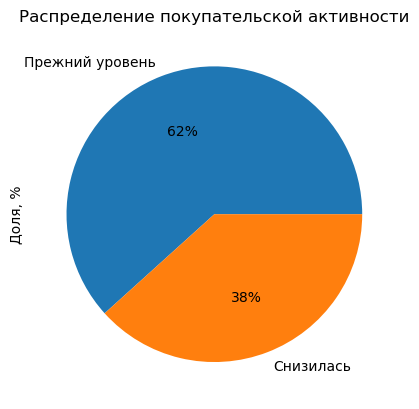

In [23]:
# Выведем диаграмму распределения покупательской активности
a=market_file
b='покупательская_активность'
c='Распределение покупательской активности'
d='Доля, %'
pie_cat(a, b, c, d)

Это наш целевой признак. Соотношение 62/38 что указывает на небольшой дисбаланс. Учтем этот факт в дальнейшем.

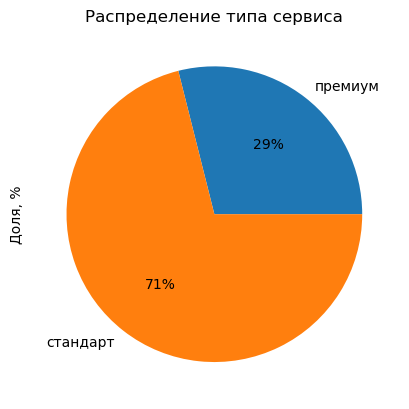

In [24]:
# Выведем диаграмму распределения типа сервиса
a=market_file
b='тип_сервиса'
c='Распределение типа сервиса'
d='Доля, %'
pie_cat(a, b, c, d)

29% клиентов имеют доступ к премиальному обслуживанию.

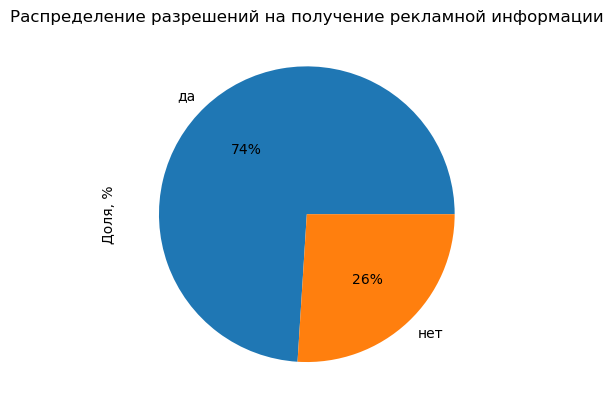

In [25]:
# Выведем диаграмму распределения разрешений на получение рекламной информации
a=market_file
b='разрешить_сообщать'
c='Распределение разрешений на получение рекламной информации'
d='Доля, %'
pie_cat(a, b, c, d)

74% клиентов согласны на получение рекламной информации от магазина.

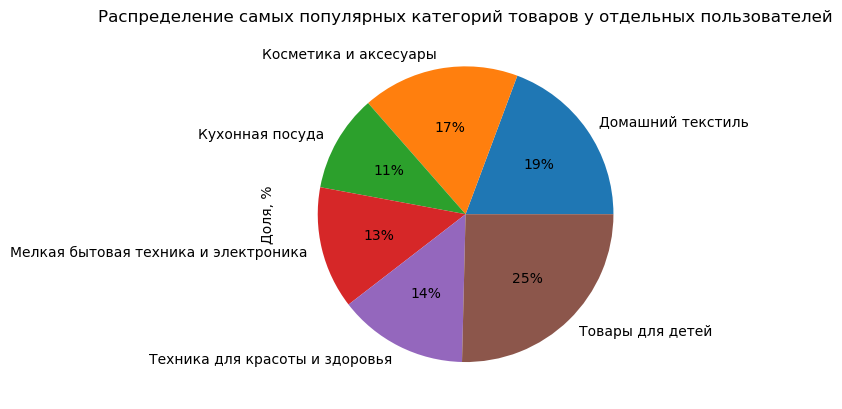

популярная_категория
Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: count, dtype: int64

In [26]:
# Выведем диаграмму распределения самых популярных категорий товаров у отдельных пользователей
a=market_file
b='популярная_категория'
c='Распределение самых популярных категорий товаров у отдельных пользователей'
d='Доля, %'
pie_cat(a, b, c, d)
market_file['популярная_категория'].value_counts()

Наиболее популяная категория у клиентов - товары для детей. За ней следуют домашний текстиль и косметика.

Посмотрим распределения числовых признаков

In [27]:
# Исследовательский анализ числовых признаков market_file
market_file.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


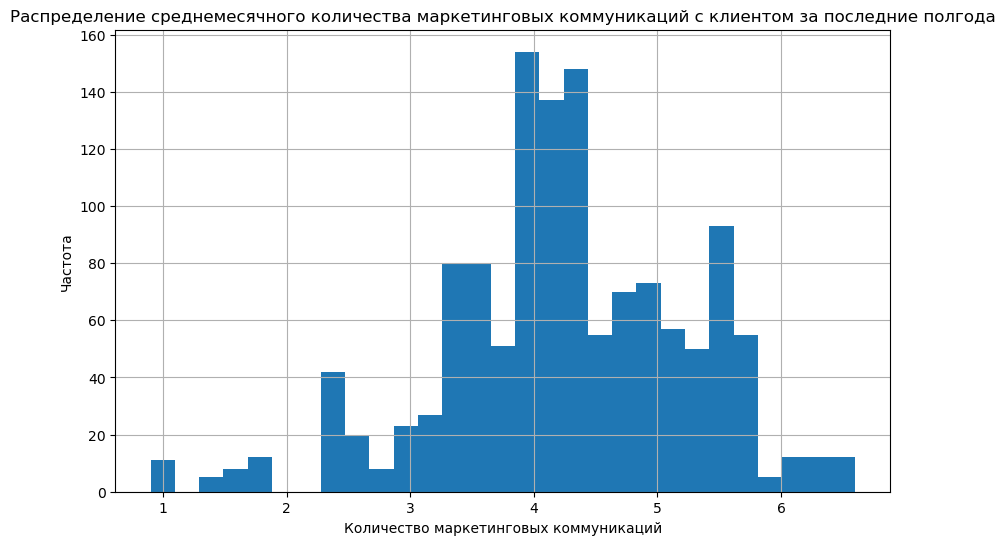

count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: маркет_актив_6_мес, dtype: float64


In [28]:
# Выведем диаграмму распределения среднемесячного количества маркетинговых коммуникаций с клиентом за последние полгода
a=market_file
b='маркет_актив_6_мес'
c='Распределение среднемесячного количества маркетинговых коммуникаций с клиентом за последние полгода'
d='Количество маркетинговых коммуникаций'
e=29
hist_num(a, b, c, d, e)

В среднем за последние полгода магазин делал 4,2 рассылки в месяц на одного клиента

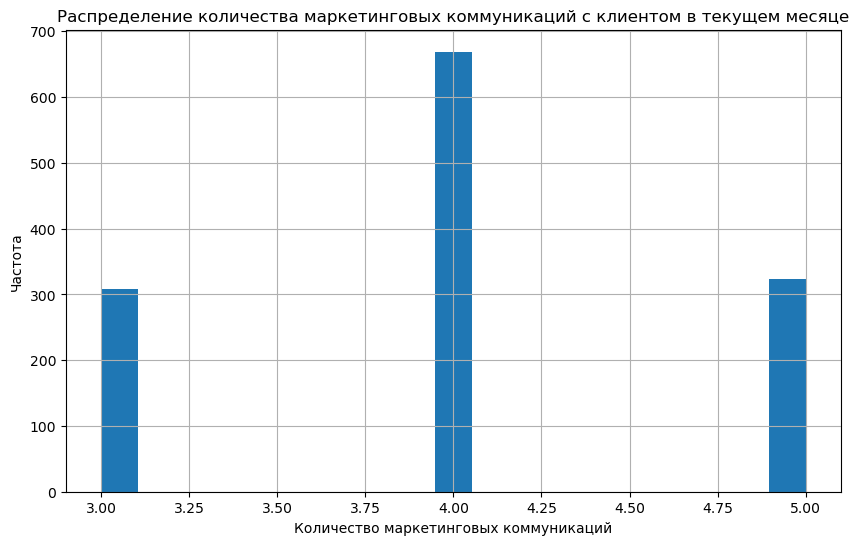

count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: маркет_актив_тек_мес, dtype: float64


In [29]:
# Выведем диаграмму распределения количества маркетинговых коммуникаций с клиентом в текущем месяце
a=market_file
b='маркет_актив_тек_мес'
c='Распределение количества маркетинговых коммуникаций с клиентом в текущем месяце'
d='Количество маркетинговых коммуникаций'
e=19
hist_num(a, b, c, d, e)

В текущем месяце магазин в среднем рассылал 4 письма с информацией рекламного характера клентам.

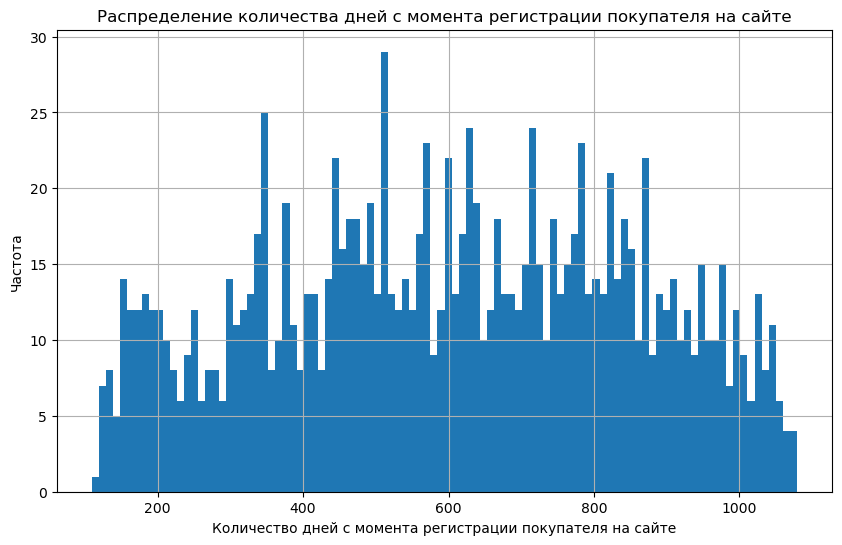

count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: длительность, dtype: float64


In [30]:
# Выведем диаграмму распределения количества дней с момента регистрации покупателя на сайте
a=market_file
b='длительность'
c='Распределение количества дней с момента регистрации покупателя на сайте'
d='Количество дней с момента регистрации покупателя на сайте'
e=100
hist_num(a, b, c, d, e)

Около трех лет назад магазин начал развивать инструмент регистрации постоянных покупателей (предположение). Первые месяцы количество новых клиентов росло, пока не вышло на некое "плато". На гистограмме отмечаются периодические всплески количества новых пользователей, связанные видимо с некими маркетинговыми акциями. В последний год этих всплесков нет.

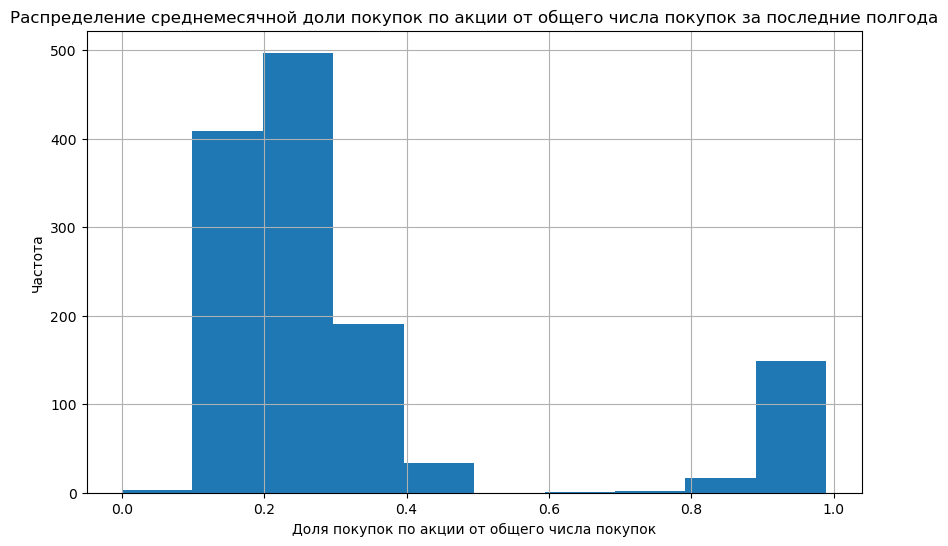

count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64


In [31]:
# Выведем диаграмму распределения среднемесячной доли покупок по акции от общего числа покупок за последние полгода
a=market_file
b='акционные_покупки'
c='Распределение среднемесячной доли покупок по акции от общего числа покупок за последние полгода'
d='Доля покупок по акции от общего числа покупок'
e=10
hist_num(a, b, c, d, e)

Покупатели явно делятся на две категории, она группа предпочитает покупать ислючительно акционные товары. 
<br>
Но вторая удивляет больше: где они находят столько товаров не "по акции"?

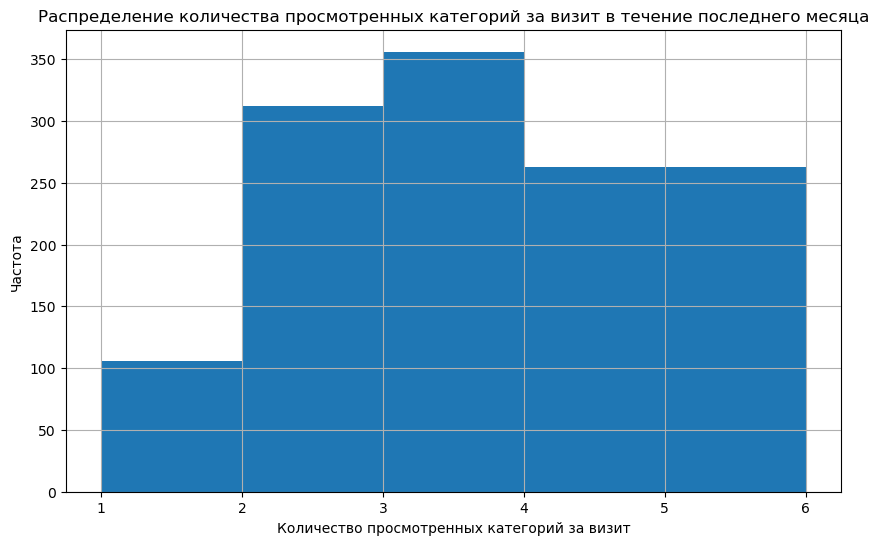

count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: средний_просмотр_категорий_за_визит, dtype: float64


In [32]:
# Выведем диаграмму распределения количества просмотренных категорий за визит в течение последнего месяца
a=market_file
b='средний_просмотр_категорий_за_визит'
c='Распределение количества просмотренных категорий за визит в течение последнего месяца'
d='Количество просмотренных категорий за визит'
e=5
hist_num(a, b, c, d, e)

От двух до шести категорий просматривают покупатели за визит в течение последнего месяца

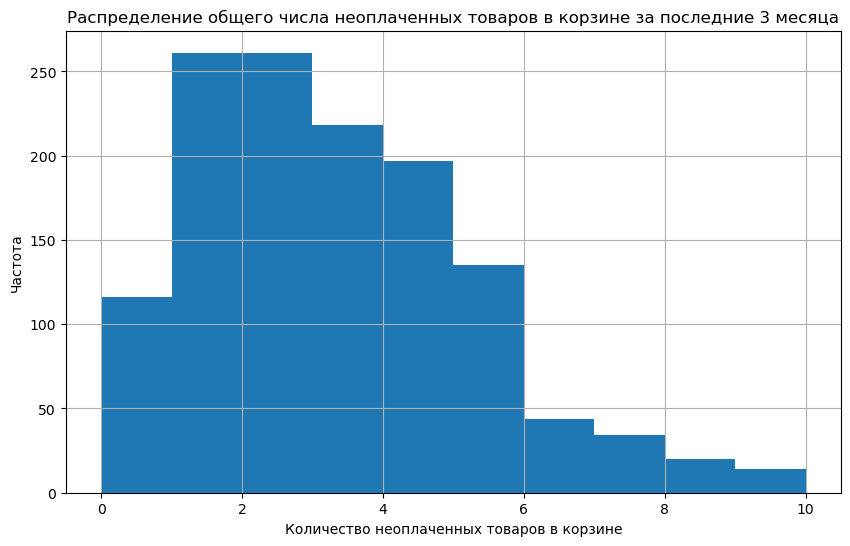

count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: неоплаченные_продукты_штук_квартал, dtype: float64


In [33]:
# Выведем диаграмму распределения общего числа неоплаченных товаров в корзине за последние 3 месяца
a=market_file
b='неоплаченные_продукты_штук_квартал'
c='Распределение общего числа неоплаченных товаров в корзине за последние 3 месяца'
d='Количество неоплаченных товаров в корзине'
e=10
hist_num(a, b, c, d, e)

В среднем три позиции в корзине остаются не неоплаченными за последние полгода.

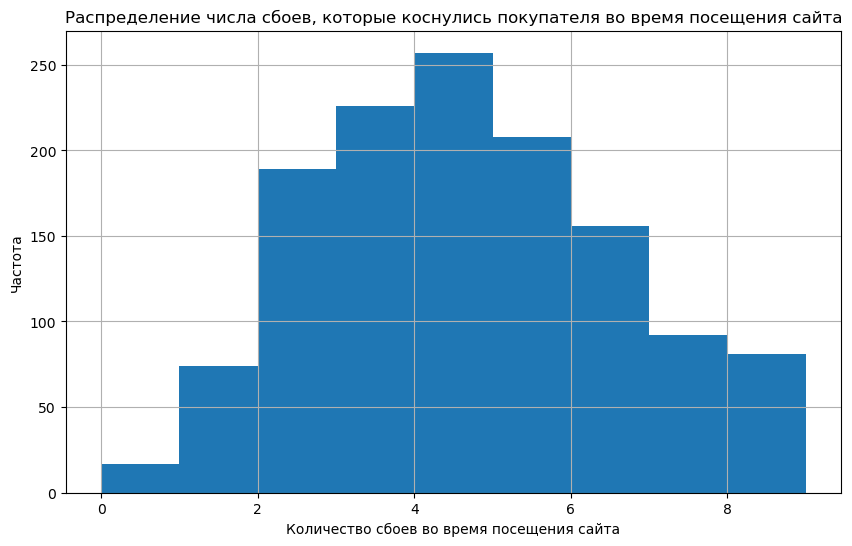

count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: ошибка_сервиса, dtype: float64


In [34]:
# Выведем диаграмму распределения числа сбоев, которые коснулись покупателя во время посещения сайта
a=market_file
b='ошибка_сервиса'
c='Распределение числа сбоев, которые коснулись покупателя во время посещения сайта'
d='Количество сбоев во время посещения сайта'
e=9
hist_num(a, b, c, d, e)

Удивительно как часто посетители сталкиваются со сбоями в работе сайта

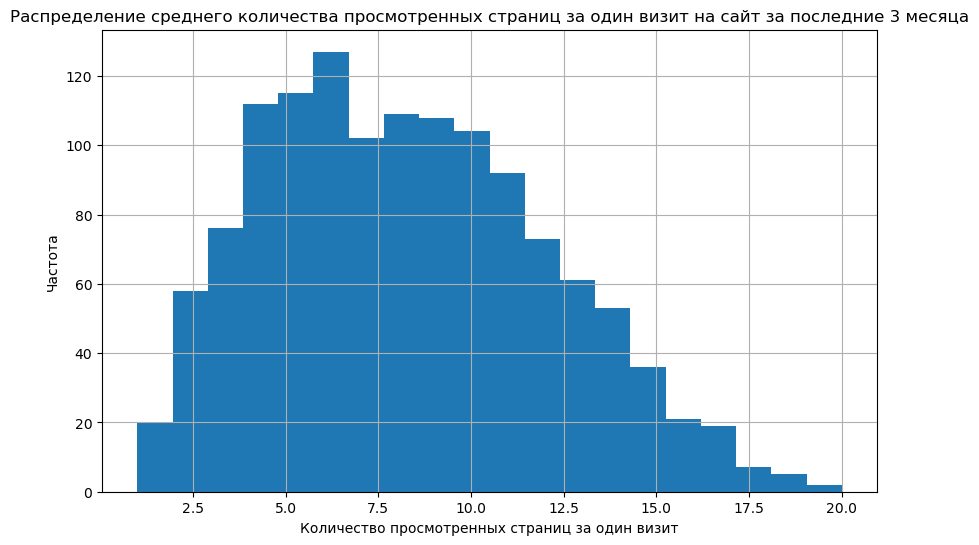

count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: страниц_за_визит, dtype: float64


In [35]:
# Выведем диаграмму распределения среднего количества просмотренных страниц за один визит на сайт за последние 3 месяца
a=market_file
b='страниц_за_визит'
c='Распределение среднего количества просмотренных страниц за один визит на сайт за последние 3 месяца'
d='Количество просмотренных страниц за один визит'
e=20
hist_num(a, b, c, d, e)

Восемь страниц в среднем просматривали покупатели за один визит на сайт за последние 3 месяца.

Далее данные **market_money**

In [36]:
market_money.head(10)

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
8,215350,предыдущий_месяц,5457.5
9,215351,текущий_месяц,6610.4


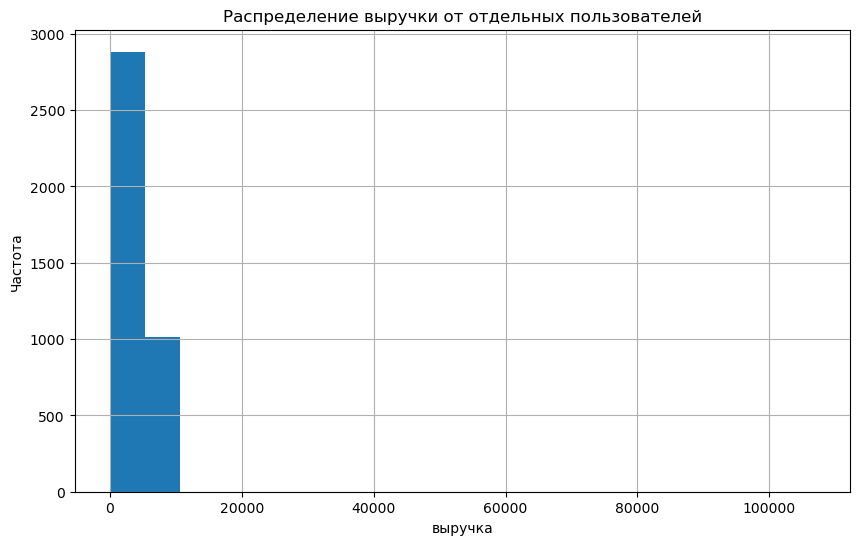

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: выручка, dtype: float64


In [37]:
# Выведем диаграмму распределения выручки от отдельных пользователей
a=market_money
b='выручка'
c='Распределение выручки от отдельных пользователей'
d='выручка'
e=20
hist_num(a, b, c, d, e)

Судя по распределению, мы имеем выбросы с аномально большими значениями.

In [38]:
# Изучим самые большие значения выручки
market_money.sort_values(by='выручка', ascending=False).head(10)

,id,период,выручка
98,215380,текущий_месяц,106862.2
435,215493,текущий_месяц,7799.4
262,215435,текущий_месяц,7605.3
1481,215841,текущий_месяц,7557.0
2388,216144,текущий_месяц,7547.8
566,215536,текущий_месяц,7467.9
2266,216103,текущий_месяц,7410.0
1003,215682,текущий_месяц,7401.6
1632,215892,текущий_месяц,7401.6
1573,215872,текущий_месяц,7374.0


In [39]:
# Есть выброс с единичной выручкой более 100000. Удалим его как аномальный.
market_money = market_money[market_money['выручка'] < 100000]

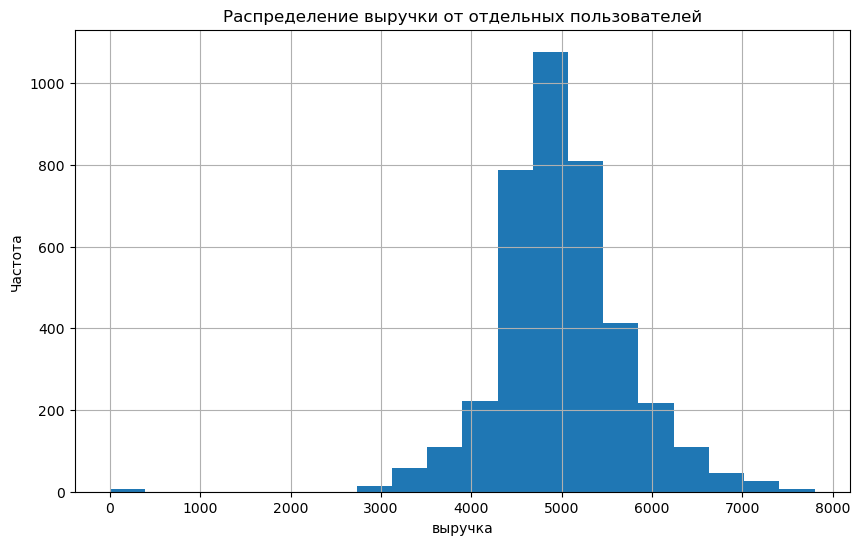

count    3899.00000
mean     4999.57743
std       706.99988
min         0.00000
25%      4590.10000
50%      4957.00000
75%      5363.00000
max      7799.40000
Name: выручка, dtype: float64


In [40]:
# Выведем диаграмму распределения выручки после удаления выброса
a=market_money
b='выручка'
c='Распределение выручки от отдельных пользователей'
d='выручка'
e=20
hist_num(a, b, c, d, e)


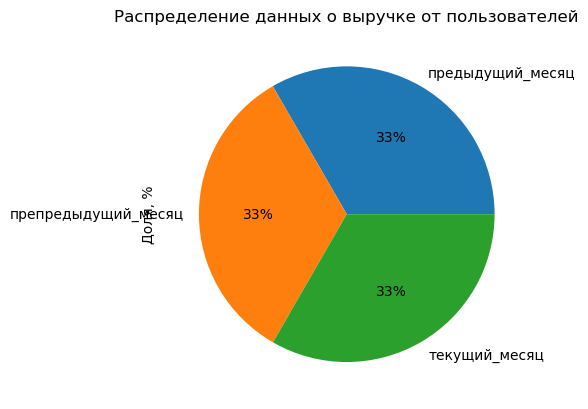

In [41]:
# Выведем диаграмму распределения данных о выручке от пользователей
a=market_money
b='период'
c='Распределение данных о выручке от пользователей'
d='Доля, %'
pie_cat(a, b, c, d)

Доли периодов равны. Очевидно, в таблице содержатся данные о выручке по каждому периоду для каждого пользователя

In [42]:
# Оценим общий объем выручки по периодам
market_money.pivot_table(index='период', values=['выручка'], aggfunc='sum')

,выручка
период,
предыдущий_месяц,6417996.5
препредыдущий_месяц,6272769.0
текущий_месяц,6802586.9


Общая выручка растет.

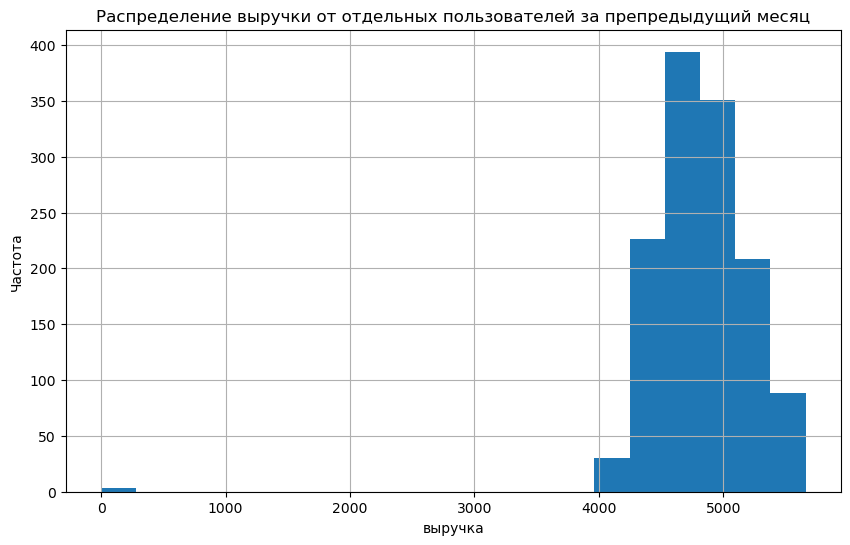

count    1300.000000
mean     4825.206923
std       405.979663
min         0.000000
25%      4583.000000
50%      4809.000000
75%      5053.500000
max      5663.000000
Name: выручка, dtype: float64


In [43]:
# Выведем диаграмму распределения выручки от отдельных пользователей за препредыдущий месяц
a=market_money[market_money['период'] == 'препредыдущий_месяц']
b='выручка'
c='Распределение выручки от отдельных пользователей за препредыдущий месяц'
d='выручка'
e=20
hist_num(a, b, c, d, e)

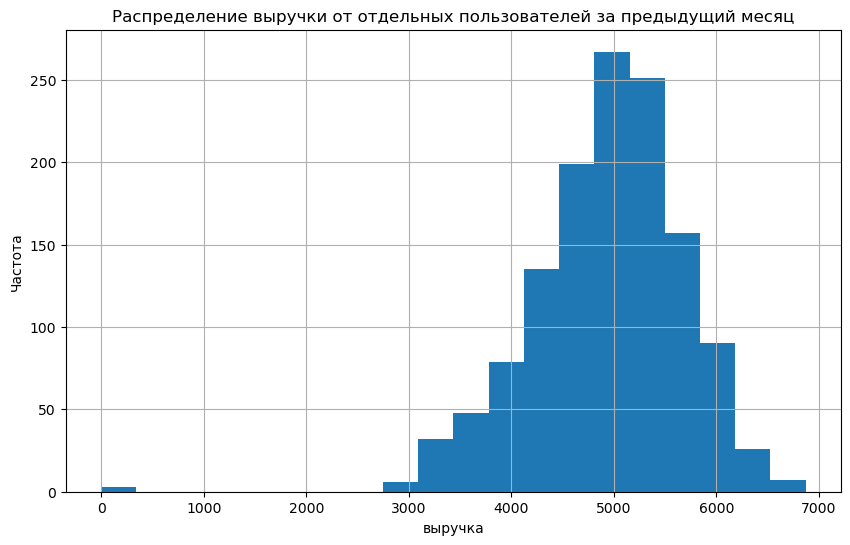

count    1300.000000
mean     4936.920385
std       739.597997
min         0.000000
25%      4496.750000
50%      5005.000000
75%      5405.625000
max      6869.500000
Name: выручка, dtype: float64


In [44]:
# Выведем диаграмму распределения выручки от отдельных пользователей за предыдущий месяц
a=market_money[market_money['период'] == 'предыдущий_месяц']
b='выручка'
c='Распределение выручки от отдельных пользователей за предыдущий месяц'
d='выручка'
e=20
hist_num(a, b, c, d, e)

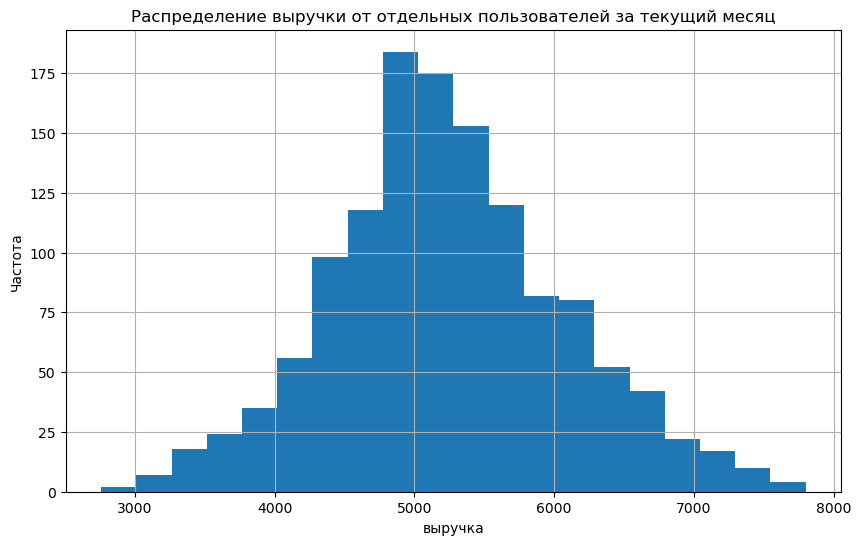

count    1299.000000
mean     5236.787452
std       835.474686
min      2758.700000
25%      4705.500000
50%      5179.600000
75%      5759.950000
max      7799.400000
Name: выручка, dtype: float64


In [45]:
# Выведем диаграмму распределения выручки от отдельных пользователей за текущий месяц
a=market_money[market_money['период'] == 'текущий_месяц']
b='выручка'
c='Распределение выручки от отдельных пользователей за текущий месяц'
d='выручка'
e=20
hist_num(a, b, c, d, e)

Средняя выручка по месяцам растет. Распределения становятся более широкими.

Далее данные **market_time**

In [46]:
market_time.head(10)

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдущий_месяц,8
6,215351,текущий_месяц,13
7,215351,предыдущий_месяц,11
8,215352,текущий_месяц,11
9,215352,предыдущий_месяц,8


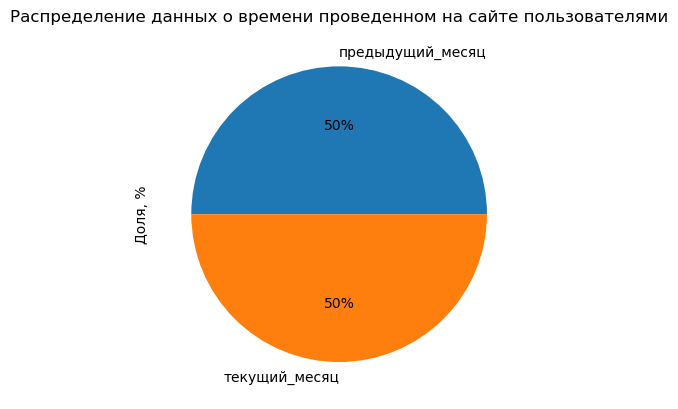

In [47]:
# Выведем диаграмму распределения данных о времени проведенном на сайте пользователями
a=market_time
b='период'
c='Распределение данных о времени проведенном на сайте пользователями'
d='Доля, %'
pie_cat(a, b, c, d)

In [48]:
# Оценим общее время проведенное на сайте пользователями
market_time.pivot_table(index='период', values=['минут'], aggfunc='sum')

,минут
период,
предыдущий_месяц,17508
текущий_месяц,17166


Время незначительно снизилось, или текущий месяц еще не закончился?

Далее исследуем данные **money**

In [49]:
money.head(10)

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
5,215353,3.95
6,215354,3.62
7,215355,5.26
8,215356,4.93
9,215357,4.66


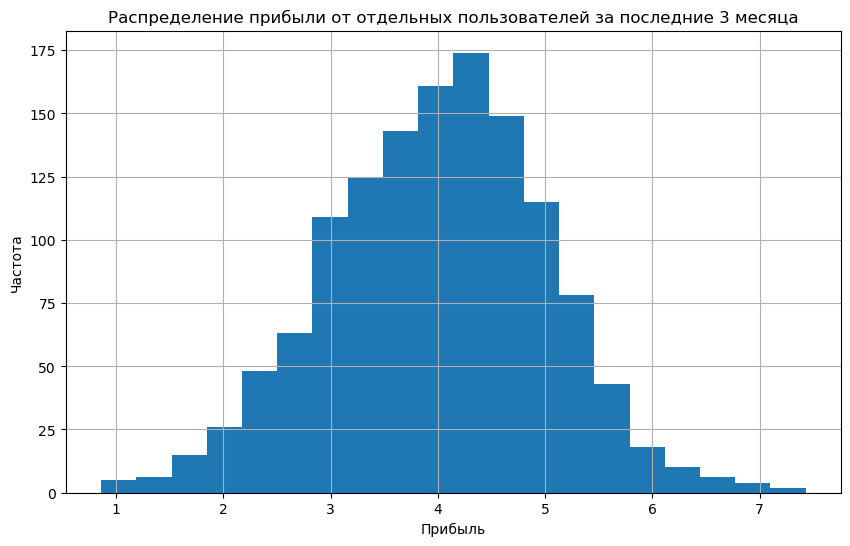

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64


In [50]:
# Выведем диаграмму распределения прибыли от отдельных пользователей за последние 3 месяца
a=money
b='прибыль'
c='Распределение прибыли от отдельных пользователей за последние 3 месяца'
d='Прибыль'
e=20
hist_num(a, b, c, d, e)

Собственно прибыль, примерно от 3 до 5 (тысяч рублей?) в месяц с покупателя.

 **Отбор клиентов с покупательской активностью не менее трёх месяцев**
 <br>
 Нам необходимо отобрать клиентов по покупательской активности не менее трех месяцев. Нам для этой задачи подходит датасет market_money. Он содержит выручку от клиентов за три, интересующих нас, периода. В периодах, в течение которых у покупателя не было покупок, выручка равна нулю. Сгрупперум данные и удалим строки с нулевой выручкой. 

In [51]:
market_money.head(10)

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
8,215350,предыдущий_месяц,5457.5
9,215351,текущий_месяц,6610.4


In [52]:
activ_client = market_money.pivot_table(index='id', columns='период', values='выручка', aggfunc='sum')
activ_client.head(10)

период,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
id,,,
215348,0.0,0.0,3293.1
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4
215352,5807.5,4594.0,5872.5
215353,4738.5,5124.0,5388.5
215354,5685.0,4503.0,5869.6
215355,3263.0,4749.0,3772.6
215356,4146.5,4433.0,4566.4


In [53]:
activ_client = activ_client.replace({'0':np.nan, 0:np.nan})
activ_client = activ_client.dropna()

In [54]:
activ_client

период,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
id,,,
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4
215352,5807.5,4594.0,5872.5
215353,4738.5,5124.0,5388.5
...,...,...,...
216643,3664.0,4704.0,4741.7
216644,4729.0,5299.0,5353.0
216645,5160.0,5334.0,5139.2


1297 клиентов с покупательской активностью не менее трех месяцев.

**Выводы по результатам шага**
<br>
Проведен исследовательский анализ данных из каждой таблицы. Распределения данных можно назвать ожидаемыми. Выявлено одно аномальное значение с выручкой более 100000, возможно это единичная крупная покупка, но ее стоило удалить для общего баланса в данных. Произведен отбор клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.

## Объединение таблиц


In [55]:
# Объединять данные будем на основе датасета market_file, объединять начнем с отфильрованной версией датасета market_money
# (activ_client), т.к. нам в дальнейшем необходимо анализировать вероятность снижения покупательской активности клиента 
# в следующие три месяца
full_data = market_file.join(activ_client, on='id', how='right')
full_data.head(10)

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5
6,215354,Снизилась,стандарт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2,5685.0,4503.0,5869.6
7,215355,Снизилась,стандарт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4,3263.0,4749.0,3772.6
8,215356,Снизилась,стандарт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3,4146.5,4433.0,4566.4
10,215358,Снизилась,стандарт,да,4.7,4,450,0.13,Домашний текстиль,4,2,6,4,3488.0,4727.0,4209.5
12,215360,Снизилась,премиум,да,3.9,3,623,0.35,Кухонная посуда,3,1,4,7,5304.5,5555.0,5834.9


In [56]:
# Добавим данные market_time предварительно сгрупперовав их по периодам
market_time_gr = market_time.pivot_table(index='id', columns='период', values='минут', aggfunc='sum')
full_data = full_data.join(market_time_gr, on='id', how='left', lsuffix='_выручка', rsuffix='_минут')
full_data.rename(columns={'препредыдущий_месяц':'препредыдущий_месяц_выручка'}, inplace = True)

In [57]:
full_data.head(10)

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10
6,215354,Снизилась,стандарт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2,5685.0,4503.0,5869.6,11,12
7,215355,Снизилась,стандарт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4,3263.0,4749.0,3772.6,12,10
8,215356,Снизилась,стандарт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3,4146.5,4433.0,4566.4,6,7
10,215358,Снизилась,стандарт,да,4.7,4,450,0.13,Домашний текстиль,4,2,6,4,3488.0,4727.0,4209.5,14,10
12,215360,Снизилась,премиум,да,3.9,3,623,0.35,Кухонная посуда,3,1,4,7,5304.5,5555.0,5834.9,9,6


Данные собраны в один датасет. Столбцы данных за определенные периоды переназваны в соответствии с содержанием.

## Корреляционный анализ


interval columns not set, guessing: ['id', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'предыдущий_месяц_выручка', 'препредыдущий_месяц_выручка', 'текущий_месяц_выручка', 'предыдущий_месяц_минут', 'текущий_месяц_минут']


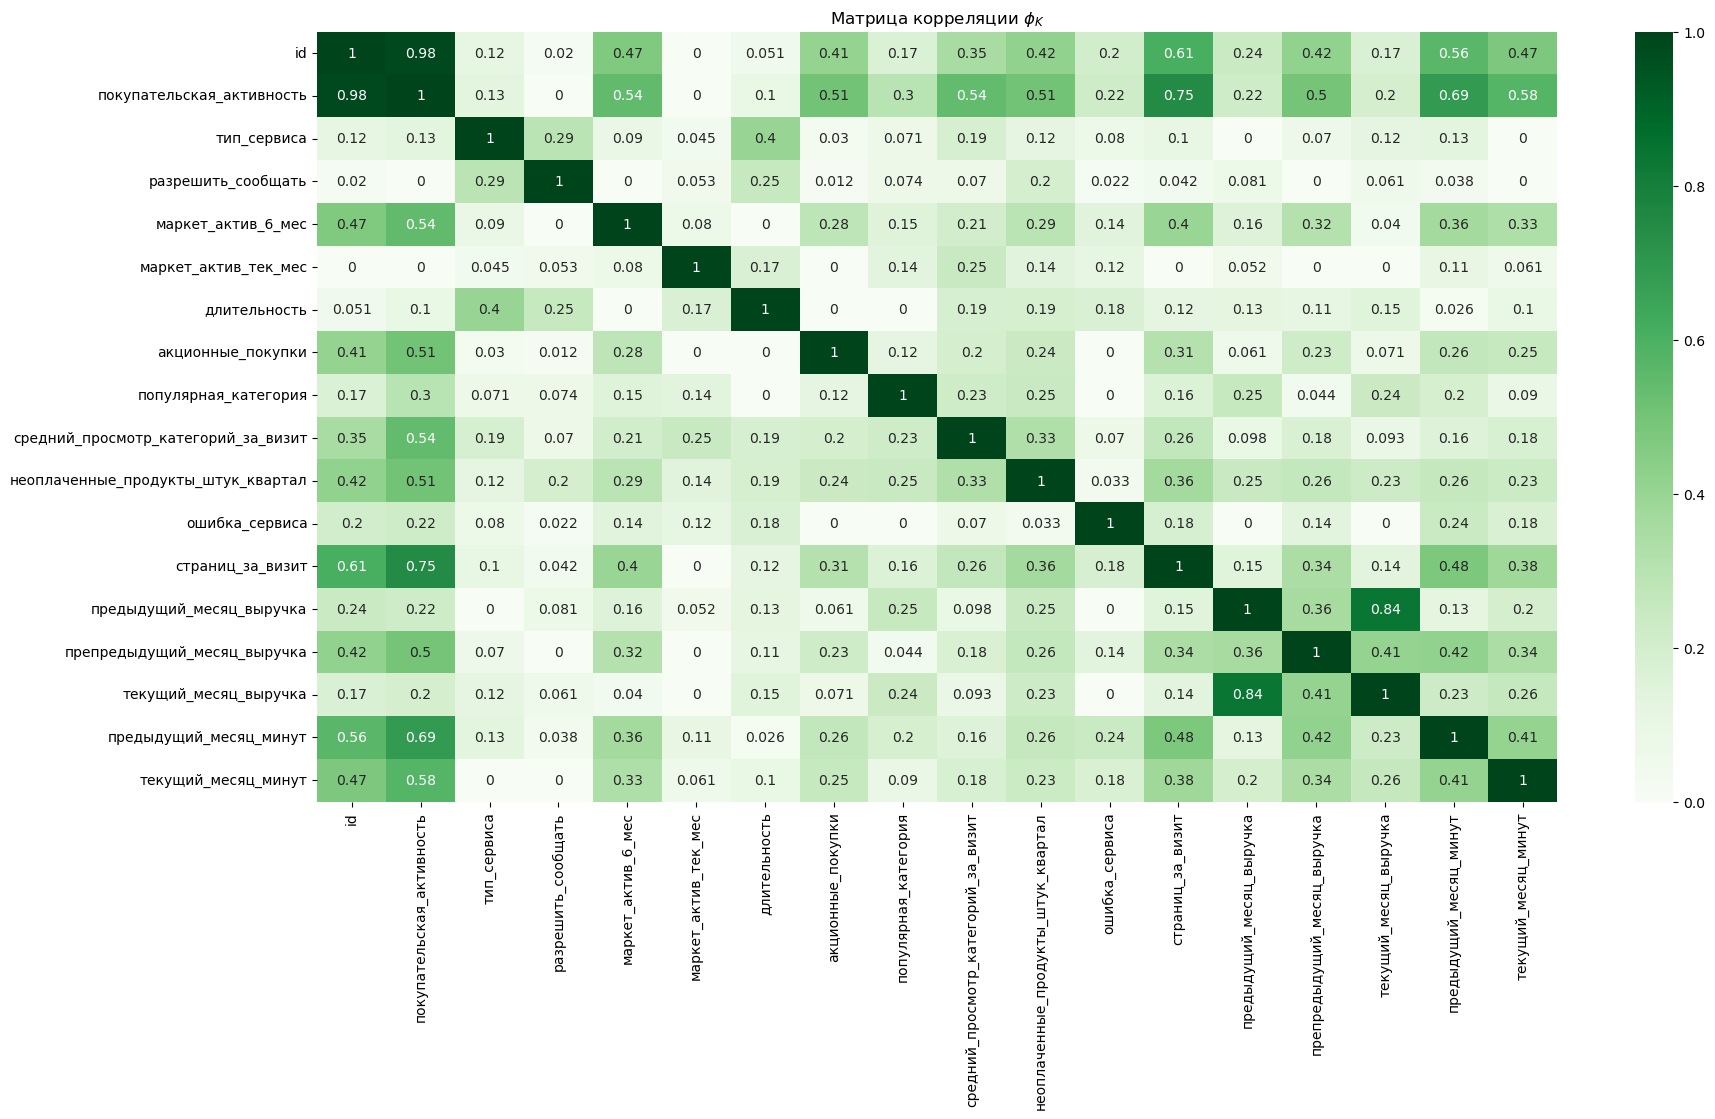

In [58]:
# Выведем матрицу корреляции
target_matrix = full_data.phik_matrix()
plt.figure(figsize=(20, 10))
sns.heatmap(target_matrix, annot=True, cmap='Greens')
plt.title('Матрица корреляции $\phi_K$')
plt.show()

In [59]:
# Выведем метрицу в виде таблицы
target_matrix

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут
id,1.000000,0.984597,0.116473,0.019783,0.466290,0.000000,0.050714,0.413956,0.171846,0.353945,0.418111,0.204583,0.608831,0.238373,0.421755,0.173750,0.564878,0.473579
покупательская_активность,0.984597,1.000000,0.129940,0.000000,0.544831,0.000000,0.099901,0.506276,0.299717,0.539607,0.505655,0.224154,0.749888,0.224638,0.497393,0.197213,0.685138,0.576770
тип_сервиса,0.116473,0.129940,1.000000,0.289965,0.089911,0.045258,0.401411,0.030010,0.070809,0.185391,0.120027,0.079515,0.102594,0.000000,0.069704,0.124216,0.131814,0.000000
разрешить_сообщать,0.019783,0.000000,0.289965,1.000000,0.000000,0.052618,0.253831,0.012198,0.073684,0.070359,0.195982,0.021839,0.042134,0.080842,0.000000,0.060907,0.038387,0.000000
маркет_актив_6_мес,0.466290,0.544831,0.089911,0.000000,1.000000,0.079854,0.000000,0.279553,0.150386,0.206788,0.289421,0.142401,0.396769,0.155476,0.315331,0.039795,0.363950,0.330601
маркет_актив_тек_мес,0.000000,0.000000,0.045258,0.052618,0.079854,1.000000,0.174233,0.000000,0.136243,0.246633,0.144203,0.116946,0.000000,0.051824,0.000000,0.000000,0.107945,0.061410
длительность,0.050714,0.099901,0.401411,0.253831,0.000000,0.174233,1.000000,0.000000,0.000000,0.186795,0.192611,0.175608,0.122495,0.125572,0.113200,0.147048,0.026448,0.101481
акционные_покупки,0.413956,0.506276,0.030010,0.012198,0.279553,0.000000,0.000000,1.000000,0.122385,0.199180,0.237962,0.000000,0.311418,0.060733,0.226381,0.071094,0.262324,0.250558
популярная_категория,0.171846,0.299717,0.070809,0.073684,0.150386,0.136243,0.000000,0.122385,1.000000,0.226116,0.248620,0.000000,0.160300,0.252097,0.043528,0.237240,0.195233,0.089883
средний_просмотр_категорий_за_визит,0.353945,0.539607,0.185391,0.070359,0.206788,0.246633,0.186795,0.199180,0.226116,1.000000,0.325578,0.070315,0.262271,0.098440,0.176828,0.092597,0.159837,0.182568


In [60]:
# Выделим и отсортируем коэффициенты корреляции с нашим целевым признаком
target_matrix['покупательская_активность'].sort_values(ascending=False)

покупательская_активность              1.000000
id                                     0.984597
страниц_за_визит                       0.749888
предыдущий_месяц_минут                 0.685138
текущий_месяц_минут                    0.576770
маркет_актив_6_мес                     0.544831
средний_просмотр_категорий_за_визит    0.539607
акционные_покупки                      0.506276
неоплаченные_продукты_штук_квартал     0.505655
препредыдущий_месяц_выручка            0.497393
популярная_категория                   0.299717
предыдущий_месяц_выручка               0.224638
ошибка_сервиса                         0.224154
текущий_месяц_выручка                  0.197213
тип_сервиса                            0.129940
длительность                           0.099901
маркет_актив_тек_мес                   0.000000
разрешить_сообщать                     0.000000
Name: покупательская_активность, dtype: float64

Мы вывели матрицу корреляции, также отдельно отсортированный столбец корреляции целевого признака 'покупательская_активность'.
<br>
Наилучшая корреляция у нас получается с признаком 'id', что неожидано! Возможно это объясняется тем, что номер id присваивается по какой-то логике и она как-то коррелируется с покупательской активностью, к примеру по очередности регистрации на сайте. Мы все же предположим, что эти номера id присваивались Заказчиком перед передачей нам данных для анализа, при этом таблица была отсортирована по признаку покупательской активности. Тогда этот признак мы не используем в моделях и можем назначить его индексом в датасете. Оснований для возможной мультиколлиниарности больше не наблюдается.

In [61]:
full_data = full_data.set_index('id')
full_data

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут
id,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7
216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11
216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18


Таким образом, наилучшая корреляция выявлена у признаков 'страниц_за_визит', 'предыдущий_месяц_минут', 'текущий_месяц_минут', 'маркет_актив_6_мес', 'средний_просмотр_категорий_за_визит', 'акционные_покупки', 'неоплаченные_продукты_штук_квартал' и 'препредыдущий_месяц_выручка'.
<br>
Признаки 'маркет_актив_тек_мес', 'разрешить_сообщать' и 'текущий_месяц_выручка' практически не коррелируются с целевым признаком.

In [62]:
full_data['популярная_категория'].astype('category')
full_data['покупательская_активность'] = full_data['покупательская_активность'].apply( lambda x: 1 if x=='Снизилась' else 0 )
full_data['покупательская_активность'] = full_data['покупательская_активность'].astype(int) 

## Использование пайплайнов


In [63]:
# Подготовим пайплайны

# Фиксируем константы
RANDOM_STATE = 42
TEST_SIZE = 0.25

# Делим датасет на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    full_data.drop(['покупательская_активность'], axis=1),
    full_data['покупательская_активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = full_data['покупательская_активность'])

# создаём списки с названиями признаков
ohe_columns = ['разрешить_сообщать', 'популярная_категория']
ord_columns = ['тип_сервиса']
num_columns = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 
               'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 
               'страниц_за_визит', 'предыдущий_месяц_выручка', 'препредыдущий_месяц_выручка', 
               'текущий_месяц_выручка', 'предыдущий_месяц_минут', 'текущий_месяц_минут']

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', sparse=False))
    ]
    )
ord_pipe = Pipeline(
    [('simple_imputer_ord_before', 
      SimpleImputer(missing_values=np.nan, strategy='most_frequent')), 
     ('ord', OrdinalEncoder(categories=[['премиум','стандарт']], handle_unknown='use_encoded_value', unknown_value=np.nan)), 
     ('simple_imputer_ord_after', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [64]:
# Подготовим модели с гиперпараметрами

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
   

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, kernel='poly', probability= True)],
        'models__degree': range(2, 3),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] 
    }
]

Запустим случайный поиск лучшей модели передав ей список словарей с моделями и их гиперпараметрами. 
<br>Метрику для выбора лучшей модели выберем roc_auc, т.к. она оптимальна в ситуациях когда необходимо оценить качество работы модели вне зависимости от выбранного порога вероятности. А также ее можно использовать в случае, когда объектов с одним значением целевого признака больше, чем с другими, как в нашем случае.

In [65]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simple_imputer_ord_before',
                                                  

Лучшая модель: логистическая регрессия с С=2

In [66]:
print ('Метрика лучшей модели на тренировочной выборке:', round(randomized_search.best_score_, 3))

Метрика лучшей модели на тренировочной выборке: 0.896


In [67]:
# проверим работу модели на тестовой выборке, для чего рассчитаем прогноз на тестовых данных
y_test_pred = randomized_search.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке:', round(roc_auc_score(y_test, y_test_pred[:, 1]), 3))

Метрика ROC-AUC на тестовой выборке: 0.917


In [68]:
pd.set_option('display.max_colwidth', None)

In [69]:
# Посмотрим итоговый рейтинг наших моделей по результатам поиска
result = pd.DataFrame(randomized_search.cv_results_)
print(display(result[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score'))) 

,rank_test_score,param_models,mean_test_score,params
8,1,"LogisticRegression(C=2, penalty='l1', random_state=42, solver='liblinear')",0.895993,"{'preprocessor__num': StandardScaler(), 'models__C': 2, 'models': LogisticRegression(C=2, penalty='l1', random_state=42, solver='liblinear')}"
7,2,"LogisticRegression(C=2, penalty='l1', random_state=42, solver='liblinear')",0.893883,"{'preprocessor__num': 'passthrough', 'models__C': 1, 'models': LogisticRegression(C=2, penalty='l1', random_state=42, solver='liblinear')}"
5,3,"SVC(kernel='poly', probability=True, random_state=42)",0.881105,"{'preprocessor__num': StandardScaler(), 'models__degree': 2, 'models': SVC(kernel='poly', probability=True, random_state=42)}"
0,4,DecisionTreeClassifier(random_state=42),0.820157,"{'preprocessor__num': MinMaxScaler(), 'models__max_features': 4, 'models__max_depth': 4, 'models': DecisionTreeClassifier(random_state=42)}"
3,4,DecisionTreeClassifier(random_state=42),0.820157,"{'preprocessor__num': 'passthrough', 'models__max_features': 4, 'models__max_depth': 4, 'models': DecisionTreeClassifier(random_state=42)}"
6,6,DecisionTreeClassifier(random_state=42),0.806313,"{'preprocessor__num': MinMaxScaler(), 'models__max_features': 2, 'models__max_depth': 4, 'models': DecisionTreeClassifier(random_state=42)}"
1,7,DecisionTreeClassifier(random_state=42),0.788892,"{'preprocessor__num': MinMaxScaler(), 'models__max_features': 3, 'models__max_depth': 3, 'models': DecisionTreeClassifier(random_state=42)}"
2,8,DecisionTreeClassifier(random_state=42),0.718600,"{'preprocessor__num': 'passthrough', 'models__max_features': 4, 'models__max_depth': 2, 'models': DecisionTreeClassifier(random_state=42)}"
9,8,DecisionTreeClassifier(random_state=42),0.718600,"{'preprocessor__num': StandardScaler(), 'models__max_features': 4, 'models__max_depth': 2, 'models': DecisionTreeClassifier(random_state=42)}"
4,10,DecisionTreeClassifier(random_state=42),0.704639,"{'preprocessor__num': MinMaxScaler(), 'models__max_features': 3, 'models__max_depth': 2, 'models': DecisionTreeClassifier(random_state=42)}"


None


Первые три места - логистическая регрессия с разными кодировщиками и скейлерами и с очень близкими метриками, затем  KNN(),  остальные модели серьезно отстают.

Вывод: С помощью пайплайнов нами применены все изученные ранее модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC(). Для каждой из них мы переберали как минимум один гиперпараметр. Выбрали подходящую для задачи метрику и аргументировали свой выбор. В итоге подобрали лучшую модель с метрикой roc_auc равной 0.897 и 0.918 на тренировочной и тестовой выборках соответственно. 

 Анализ важности признаков**


In [70]:
# Лучшая модель
randomized_search.best_estimator_['models']

LogisticRegression(C=2, penalty='l1', random_state=42, solver='liblinear')

In [71]:
# Лучшие кодировщик и скейлер лучшей модели
randomized_search.best_estimator_['preprocessor']

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('simpleImputer_ohe',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False))]),
                                 ['разрешить_сообщать',
                                  'популярная_категория']),
                                ('ord',
                                 Pipeline(steps=[('simple_imputer_ord_before',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ord',
                                                  OrdinalEnco...
                                 ['тип_сервиса']),
                                ('num', StandardScaler(),
                                 ['маркет_актив_6_мес', 'маркет_актив_тек_мес',
                                  'длительность', 'акционные_покупки',
                                  'средний_просмотр_категорий_за_визит',
                                  'неоплаченные_продукты_штук_квартал',
                                  'ошибка_сервиса', 'страниц_за_визит',
                                  'предыдущий_месяц_выручка',
                                  'препредыдущий_месяц_выручка',
                                  'текущий_месяц_выручка',
                                  'предыдущий_месяц_минут',
                                  'текущий_месяц_минут'])])

In [72]:
# Названия признаков
randomized_search.best_estimator_[:-1].get_feature_names_out()

array(['ohe__разрешить_сообщать_нет',
       'ohe__популярная_категория_Косметика и аксесуары',
       'ohe__популярная_категория_Кухонная посуда',
       'ohe__популярная_категория_Мелкая бытовая техника и электроника',
       'ohe__популярная_категория_Техника для красоты и здоровья',
       'ohe__популярная_категория_Товары для детей', 'ord__тип_сервиса',
       'num__маркет_актив_6_мес', 'num__маркет_актив_тек_мес',
       'num__длительность', 'num__акционные_покупки',
       'num__средний_просмотр_категорий_за_визит',
       'num__неоплаченные_продукты_штук_квартал', 'num__ошибка_сервиса',
       'num__страниц_за_визит', 'num__предыдущий_месяц_выручка',
       'num__препредыдущий_месяц_выручка', 'num__текущий_месяц_выручка',
       'num__предыдущий_месяц_минут', 'num__текущий_месяц_минут'],
      dtype=object)

In [73]:
# Подготовим данные для Shap анализа
X_train_new = randomized_search.best_estimator_['preprocessor'].fit_transform(X_train)
model_new = randomized_search.best_estimator_['models'].fit(X_train_new, y_train)

feature_names = randomized_search.best_estimator_[:-1].get_feature_names_out()
X_train_named = pd.DataFrame(X_train_new, columns=feature_names)

explainer = shap.LinearExplainer(model_new, X_train_named)
shap_values = explainer(X_train_named)

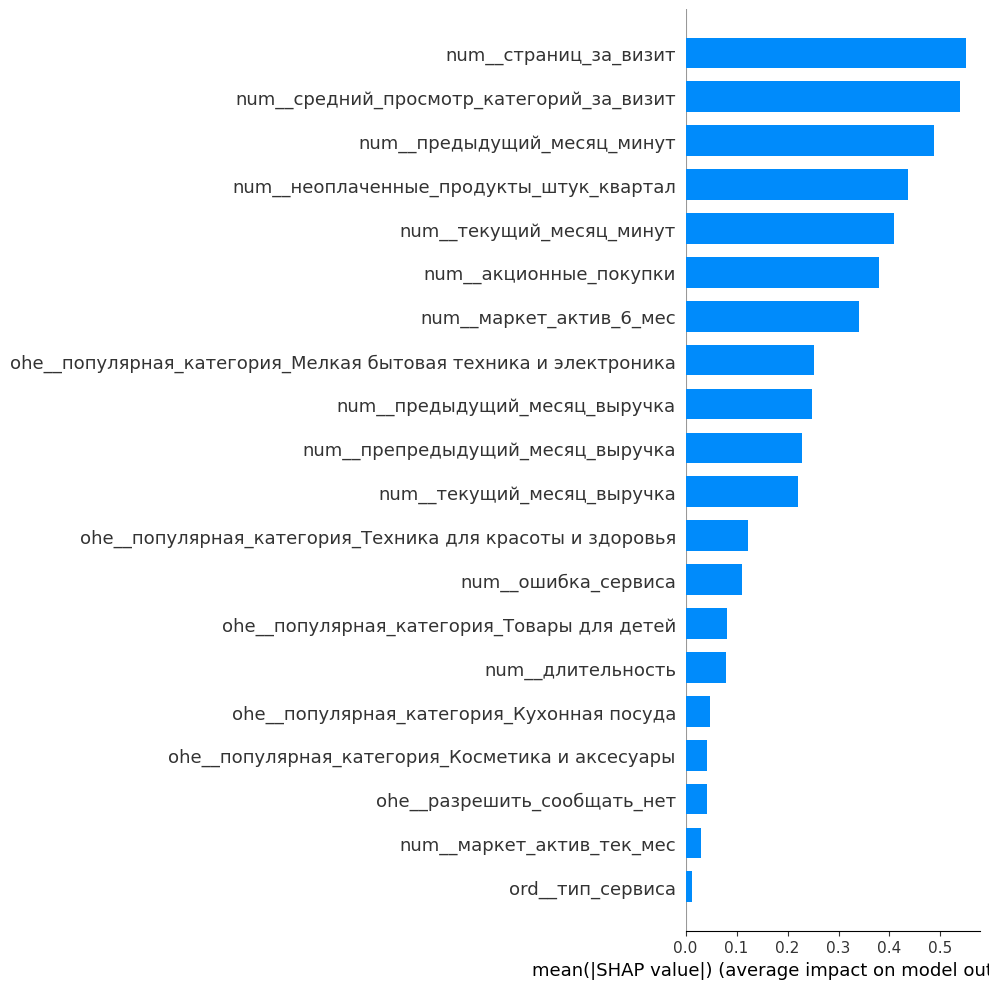

In [74]:
# Выведем график общей важности признаков
shap.summary_plot(shap_values, plot_type='bar', plot_size=(10, 10), show_values_in_legend=True)

Средние значения Shap-параметра признаков указывают нам, что самыми важными признаками для лучшей модели являются количество категорий товаров и количество страниц, просматриваемых за один визит пользователя. Далее идут количество минут на сайте, покупки по акциям и количество неоплаченных позиций в корзинах. В целом эти признаки отражают общий интерес пользователя к магазину, иными словами - ту самую покупательскую активность. 
<br>
К малозначительным признакам стоит отнести информацию о согласии на маркетинговые рассылки, уровень сервиса и маркетинговые коммуникации текущего месяца.
<br>
Отдельно отметим признак "популярная категория", какие-то категории являются важными (к примеру электроника), другие - нет, как косметика.
<br>
Как конкретно они влияют на предсказания модели мы узнаем на следующем графике.   

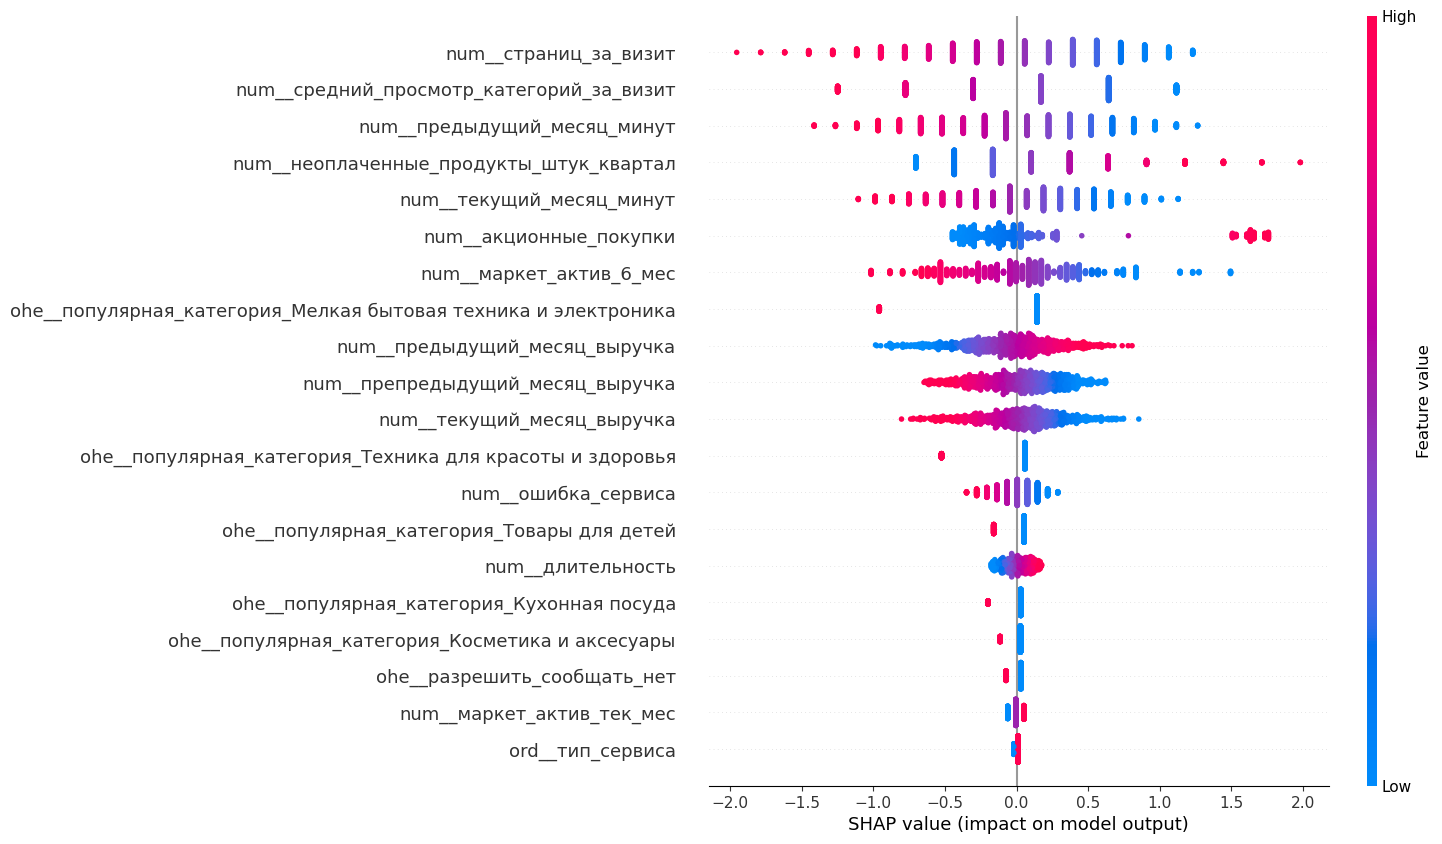

In [75]:
# Визуализируем вклад признаков в каждое предсказание модели
shap.plots.beeswarm(shap_values, plot_size=(10, 10), max_display=20)

Рост значений признаков, связанных с продолжительностью визита пользователей, склоняет прогноз модели к "прежнему уровню покупательской активности", а "акционные покупки" и "неоплаченные позиции в корзине" - наоборот. Т.е. высокая доля покупок по акциям в общем количестве покупок говорит нам о снижении покупательской активности, как и большее количество неоплаченных товаров в корзинах.
<br>

<br>


Шаг 8. Сегментация покупателей


Согласно заданию, нам необходимо сегментировать покупателей по прибыли, которую они приносят с учетом результатов моделирования. Присоединим данные по прибыли пользователей к основному датасету и добавим вероятность "покупательской активности" из нашей лучшей модели. 

In [76]:
# Для корректного объединения приведем данные к единому индексу
money = money.set_index('id')
money.head(10)

,прибыль
id,
215348,0.98
215349,4.16
215350,3.13
215351,4.87
215352,4.21
215353,3.95
215354,3.62
215355,5.26
215356,4.93


In [77]:
# Объединим данные по внутренним совпадениям индексов
full_data = full_data.join(money, how='left')
full_data.head(10)

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут,прибыль
id,,,,,,,,,,,,,,,,,,
215349,1,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,4.16
215350,1,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,3.13
215351,1,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,4.87
215352,1,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,4.21
215353,1,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,3.95
215354,1,стандарт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2,5685.0,4503.0,5869.6,11,12,3.62
215355,1,стандарт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4,3263.0,4749.0,3772.6,12,10,5.26
215356,1,стандарт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3,4146.5,4433.0,4566.4,6,7,4.93
215358,1,стандарт,да,4.7,4,450,0.13,Домашний текстиль,4,2,6,4,3488.0,4727.0,4209.5,14,10,3.06


In [78]:
# Добавим столбец с вероятностью снижения покупательской активности
X_data = full_data.drop(['покупательская_активность'], axis=1)
y_data_pred = randomized_search.predict_proba(X_data)
full_data['вероятность_снижения_активности'] = y_data_pred[:, 1]
full_data.head(10)

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут,прибыль,вероятность_снижения_активности
id,,,,,,,,,,,,,,,,,,,
215349,1,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,4.16,0.911387
215350,1,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,3.13,0.415254
215351,1,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,4.87,0.791342
215352,1,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,4.21,0.959854
215353,1,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,3.95,0.658814
215354,1,стандарт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2,5685.0,4503.0,5869.6,11,12,3.62,0.777440
215355,1,стандарт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4,3263.0,4749.0,3772.6,12,10,5.26,0.164008
215356,1,стандарт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3,4146.5,4433.0,4566.4,6,7,4.93,0.924287
215358,1,стандарт,да,4.7,4,450,0.13,Домашний текстиль,4,2,6,4,3488.0,4727.0,4209.5,14,10,3.06,0.282458


In [79]:
# Создадим функцию вывода диаграммы рассеяния
def scatterplot_feat (a, b, c, d):
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=a, x=b, y=c, hue=d)
    plt.suptitle(f'Диаграммы рассеяния между признаками\n {b} и {c}')
    print(f'Коэффициент корреляции Пирсона {round(a[c].corr(a[b]), 3)}')

Коэффициент корреляции Пирсона 0.007


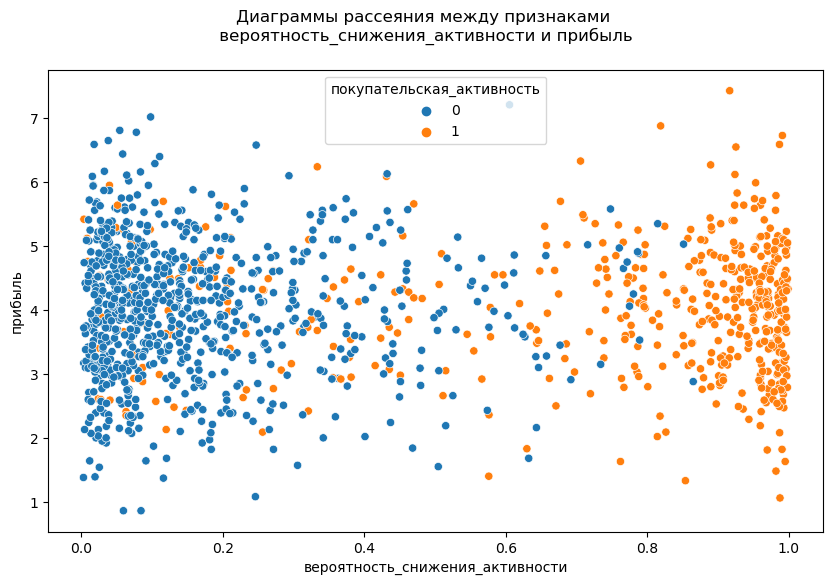

In [80]:
# Выведем диаграмму рассеяния между целевым признаком 'вероятность' и 'прибыль',
# цвет маркеров в соответствии с 'покупательская_активность'
a=full_data
b='вероятность_снижения_активности'
c='прибыль'
d='покупательская_активность'
scatterplot_feat(a, b, c, d)

На этом графике мы видим что прибыль не коррелирует с покупательской активностью. Значит будем разбираться с помощью интерпретации модели. А пока с помощью этого графика отметим корректность расчета вероятности снижения покупательской активности.
<br>
Для выявления причин снижения покупательской активности воспользуемся результатами моделирования.

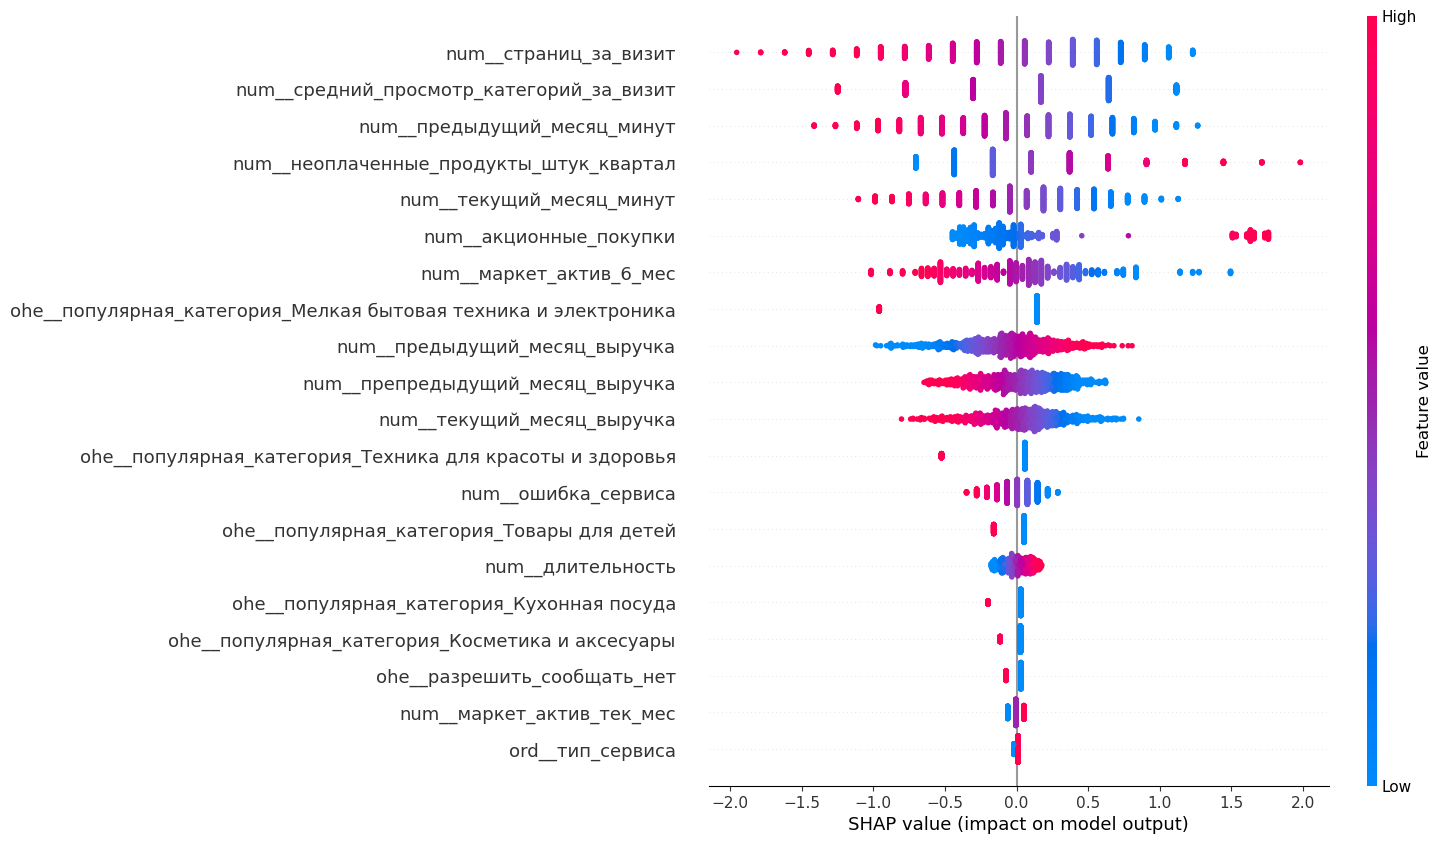

In [81]:
# Вернемся к графику оценки вклада признаков по результатам моделирования
shap.plots.beeswarm(shap_values, plot_size=(10, 10), max_display=20)

Проанализируем признаки по группам. Из важных признаков в нашей лучшей модели выделим три группы:
<br>
Первая - признаки отражающие поведение покупателей на сайте, это время, количество страниц, просмотренных категорий и т.д., они нам говорят об общей лояльности клиентов, готовых много листать страницы, выбирать, набирать и оплачивать товары. По этим признакам можно выделять и анализировать лояльных клиентов, для анализа нелояльных они не подходят.
<br>
Вторая группа - данные по выручкам трех периодов, это по сути, своего рода "утечки" нашего целевого признака, наверняка по ним формируется критерий о снижении покупательской активности. Тоже не подходят нам.
<br>
Третья группа из важных признаков - "акционные покупки" и пара популярных категорий. Именно эти признаки должны нам помочь в анализе покупателей со снижением покупательской активности. 
<br>
Далее для анализа сгрупперуем данные по популярным категориям. Использовать будем медианные значения для снижения влияния выбросов, это предпочтительнее средних значений, с учетом нашего объема данных.

In [82]:
# Сгрупперуем данные по популярным категориям покупателей, посмотрим медианные значения по доли акционных покупок
# и сопоставим с вероятностью снижения покупательской активности
category_pivot = full_data.pivot_table(index='популярная_категория', 
                                       values=['вероятность_снижения_активности', 'акционные_покупки', 'прибыль'], 
                                       aggfunc={'вероятность_снижения_активности' : ('median', 'count'),
                                               'акционные_покупки' : 'median', 'прибыль':'median'}
                                      )
category_pivot.columns = ['средняя доля акционных покупок клиентов', 'количество_пользователей', 'вероятность_снижения_активности', 'прибыль']
category_pivot.sort_values(by='вероятность_снижения_активности', ascending=False)

,средняя доля акционных покупок клиентов,количество_пользователей,вероятность_снижения_активности,прибыль
популярная_категория,,,,
Кухонная посуда,0.270,138,0.437986,4.105
Косметика и аксесуары,0.250,223,0.400904,4.150
Товары для детей,0.250,329,0.299175,4.080
Домашний текстиль,0.230,250,0.228373,4.020
Техника для красоты и здоровья,0.240,182,0.135103,3.770
Мелкая бытовая техника и электроника,0.225,174,0.066604,3.990


Доля акционных покупок по популярным категориям примерно равна. При этом, вероятность снижения покупательской активности и приносимая пользователями прибыль заметно отличается в зависимости от категории. Видимо, это то что мы искали.
<br>
Посмотрим как коррелируются эти два признака.

Коэффициент корреляции Пирсона 0.737


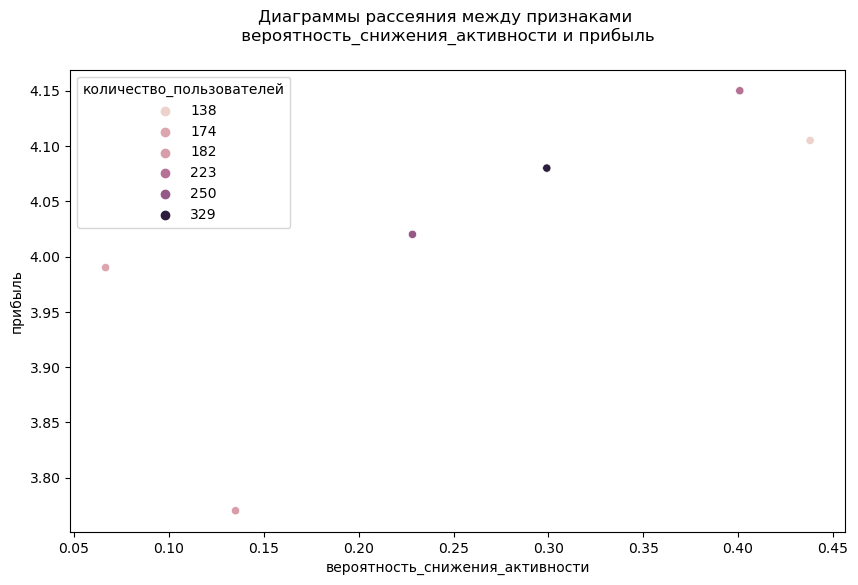

In [83]:
# Выведем диаграмму рассеяния между целевым признаком 'вероятность_снижения_активности' и 'прибыль',
# цвет маркеров в соответствии с 'количество_пользователей'
a=category_pivot
b='вероятность_снижения_активности'
c='прибыль'
d='количество_пользователей'
scatterplot_feat(a, b, c, d)

Присутствует явная корреляционная связь, коэффициент Пирсона равен 0,73. Вывод в данном случае очевиден: чем выше маржа магазина тем ниже лояльность покупателей. Очевидно, прибыльность продаж в разных категориях отличается. Отразим этот момент в итоговых выводах и рекомендациях.
<br>
Но, сводная таблица по популярным категориям не отразила влияние доли акционных покупок на снижение покупательской активности, а этот признак важен в нашей модели. Попробуем вывести диаграмму рассеяния.

Коэффициент корреляции Пирсона 0.553


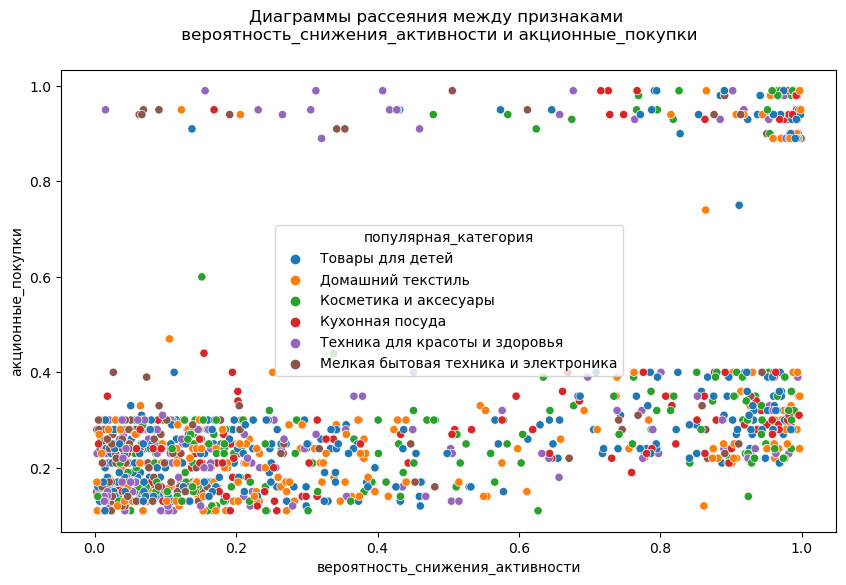

In [84]:
# Выведем диаграмму рассеяния между целевым признаком 'вероятность' и 'прибыль',
# цвет маркеров в соответствии с 'популярная_категория'
a=full_data
b='вероятность_снижения_активности'
c='акционные_покупки'
d='популярная_категория'
scatterplot_feat(a, b, c, d)

Глядя на данный график, можно отметить некие границы на уровнях 0.3 и 0.4 в доли акционных покупок. Возможно, в акционных алгоритмах зашит некий запрет на предоставление индивидуальных скидок при превышении указанных границ. Проверим гипотезу изменив на графике признак для закраски маркеров на маркетинговую активность за 6 месяцев.

Коэффициент корреляции Пирсона 0.553


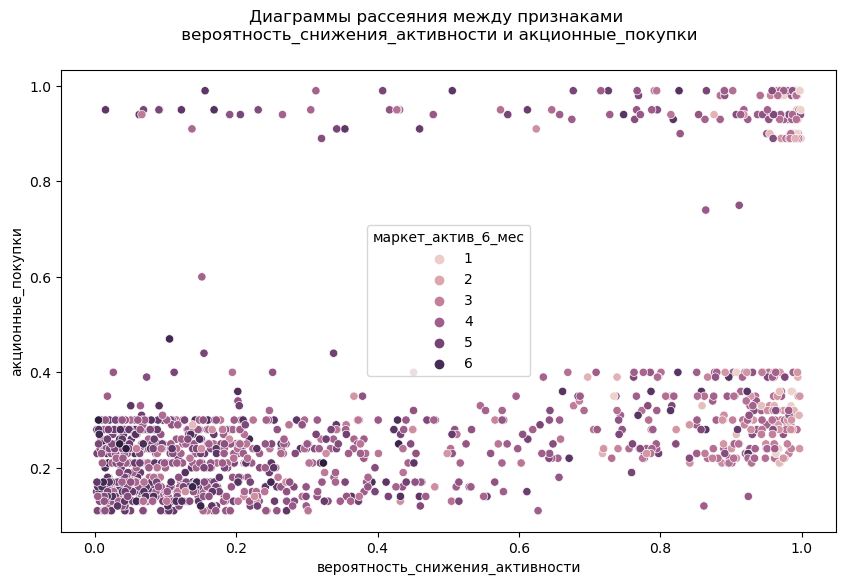

In [85]:
# Выведем диаграмму рассеяния между целевым признаком 'вероятность' и 'прибыль',
# цвет маркеров в соответствии с 'маркет_актив_6_мес'
a=full_data
b='вероятность_снижения_активности'
c='акционные_покупки'
d='маркет_актив_6_мес'
scatterplot_feat(a, b, c, d)

Наше предположение получило частичное подтверждение. Максимальная вероятность снижения покупательской активности связана в том числе с минимальным уровнем маркетинговых коммуникаций. Маловероятно, что это связано с запретом от клиентов на получение рассылок, т.к. это малозначительный признак в нашей модели.
<br>
Что касается условных границ в доли акционных покупок. Мы наблюдаем, что изначально доля акционных покупок ограничена 30%, т.е. некий алгоритм (предположение) прекращает предоставление индивидуальных скидок пока доля покупок по акции у отдельного клиента не снизится и возобновляет после снижения до необходимого уровня. Это обеспечивает минимальное количество пользователей с высокой долей покупок по акциям (левая часть графика).
<br>
Затем с ростом вероятности снижения активности выше 0,6 алгоритм предоставления индивидуальных скидок повышает порог доли акционных покупок до 40% и при этом постепенно снижается интенсивность рассылок, т.к. клиенты быстро привыкают покупать только по акциям, а алгоритм прекращает предоставлять скидки и маркетинговые коммуникации сходят на нет. При этом вероятность снижения покупательской активности начинает стремиться к 100% (правая часть графика).  
<br>
Таким образом, влияние доли акционных покупок на снижение активности является следствием неоптимального алгоритма рассылки акционных предложений.

Еще один важный признак согласно результатам моделирования - количество неоплаченных товаров в корзине. Проанализируем его.

Коэффициент корреляции Пирсона 0.553


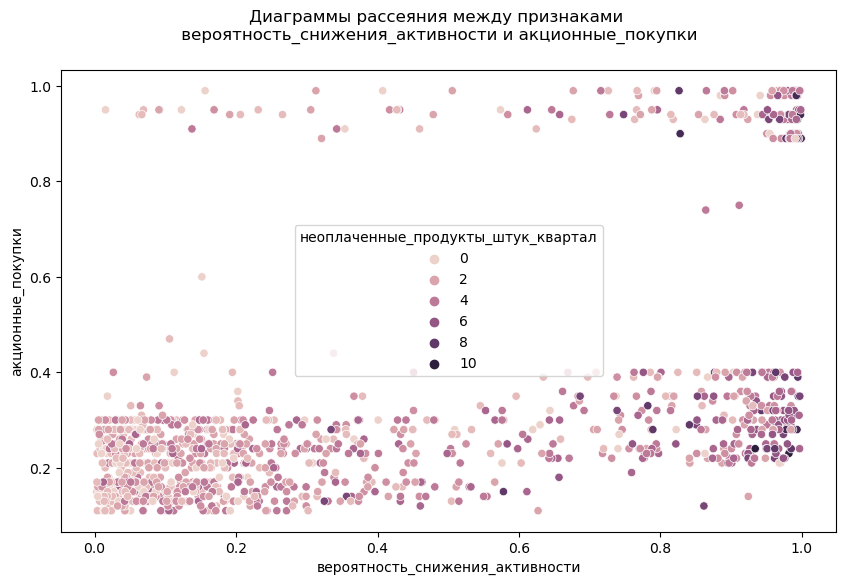

In [86]:
# Выведем диаграмму рассеяния между целевым признаком 'вероятность' и 'прибыль',
# цвет маркеров в соответствии с 'неоплаченные_продукты_штук_квартал'
a=full_data
b='вероятность_снижения_активности'
c='акционные_покупки'
d='неоплаченные_продукты_штук_квартал'
scatterplot_feat(a, b, c, d)

Это еще одни последствия неоптимального алгоритма - пользователи начинают откладывать товары в надежде на получение акционного предложения, в результате количество неоплаченного товара растет, а покупательская активность снижается до минимума.
<br>
В целом, мы готовы к выводам и рекомендациям.


**Выводы и рекомендации.**
<br>
<br>
В процессе исследований мы использовали данные предоставленные Заказчиком содержащие информацию о клиентах, их ежемесячных тратах на покупки в магазине, о поведении клиентов на сайте, выручке и прибыли магазина от каждого постоянного покупателя. В процессе загрузки данных проблем не возникло, на этапе преобработки исправили опечатки и привели к соответствию типы данных и их содержание. 
<br>
Затем мы провели исследовательский анализ данных, изучили распределения отдельных параметров и отобрали пользователей с непрерывной трехмесячной активностью. Объединили данные в датасет для корреляционного анализа и этапа моделирования.
<br>
Далее мы провели корреляционный анализ всей совокупности данных на предмет корреляции с целевым признаком отражающем снижение покупательской активности. Отметили ряд параметров с высоким коэфициентом корреляции и приступили к этапу моделирования.
<br>
Для этого использовали пайплайны. Количественные и категориальные признаки обработали в пайплайне раздельно. Для кодирования категориальных признаков использовали два кодировщика, для масштабирования количественных два скейлера.
Обучили четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC(). Для каждой из них подбирали как минимум один гиперпараметр. Затем, использовав для оценки моделей подходящую для задачи метрику выбрали лучшую модель.
<br>
На этапе анализа важности признаков применили инструмент Shaply-анализа. Проанализировали полученные результаты и приступили к сегментации покупателей с целью разработки рекомендаций для Заказчика. Для этой задачи мы добавили в исследование данные о прибыли которую приносят покупатели и приступили к изучению взаимосвязи результатов модели и прибыли, а также выявлению параметров влияющих на эту связь. Опираясь на результаты моделирования и Shaply-параметры мы выделили признаки для анализа интересующего нас сегмента покупателей с высокой вероятностью снижения покупательской активности в ближайшее время. 
<br>
В результате исследований мы пришли к следующим выводам относительно снижения покупательской активности и ее причин:
1. Первой причиной является не равномерная прибыль (маржа) продавца с товаров отдельных категорий, в результате проявляется явная корреляция между средней прибылью от отдельного покупателя и его популярной категорией. Коэффициент корреляции которой составляет 0.73, что классифицируется как сильная положительная связь. Тем более, если принять во внимание, что помимо популярной категории, любой покупатель наверняка покупает товары различных категорий, т.е. тем самым размывает эту связь, но она при этом сохраняется сильной. Данная практика (с разной маржой в категориях товаров) приводит к снижению покупательской активности у пользователей с популярной категорией товаров где маржа максимальна, а наиболее лояльные - пользователи с популярной категорией где маржа продавца минимальная. 
2. Второй причиной является странный алгоритм распределения индивидуальных акционных предложений. Изначально, он работает правильно, орентируясь на долю акционных покупок не более 30% от общей выручки от клиента, что позволяет органично развивать лояльность покупателей. Однако, при определенном снижении выручки от условного клиента, алгоритм повышает допустимую долю акционных покупок до 40% и начинает предлагать этим клиентам больше товаров со скидкой. В результате клиенты начинают ориентироваться больше на акционные покупки и доля этих покупок быстро возрастает до граничных 40%, после чего маркетинговые коммуникации прекращаются, а клиент начинает терять лояльность и его покупательская активность закономерно снижается.
<br>
**Соответсвенно, рекомендаций будет три:**
<br>
1. Необходимо либо выровнять маржу по категориям товаров, либо снизить ее там где необходимо снизить вероятность снижения покупательской активности или привлечь больше покупателей. Эффект ожидается прямой ввиду сильной корреляционной связи между параметрами. По некоторым категориям с высокой лояльностью имеет смысл поднять маржу, поэтому выравнивание маржинальности по категориям предпочтительнее.
2. Необходимо изменить алгоритм рассылки индивидуальных предложений в части ограничения доли акционных покупок. Либо оставить 30% порог для всех пользователей вне зависимости от снижения активности клиентов, либо не ограничиваться условным порогом для прекращения маркетинговых коммуникаций, их прекращать нельзя (пока клиент на них согласен).
3. Для исходных данных необходимо конкретизировать периоды для параметров. Такие характеристики как - текущий, предыдущий и тд. исключить, периоды должны быть четко обозначены. Необходимо дополнить данные по пользователям количеством общих покупок и конкретным количеством купленных товаров. Необходимо раскрыть алгоритм присваивания статуса покупательской активности.
